"""
@author: Vaishali Oga
        
"""

In [2]:
#Packages for Data cleaning
import pandas as pd
import numpy as np

#Packages for Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

#Imports for Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Modelling Helpers
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV



In [3]:
#Helper functions for visualising 

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot(n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' , str(round(df[ var_name ].skew() ), ) ) 
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False)
        fig.tight_layout()
        plt.show()
        
def plot_distribution ( df , var , target , **kwargs):
    row = kwargs.get( 'row', None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True)
    facet.set( xlim=( 0 , df[var].max() ) )
    facet.add_legend()
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row= row , col= col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize = (12 , 10) )
    #cmap = sns.diverging_paletter ( 220 , 10 , as_cmap = True )
    _ = sns.heatmap (
    corr,
    #cmap = cmap,    
    square= True,
    cbar_kws={ 'shrink' : .9},
    ax=ax,
    annot = True,
     annot_kws = { 'fontsize' : 12 }
    )
    
def describe_more ( df ):
    var = [] ; l = [] ; t= []
    for x in df:
        var.append(x)
        l.append( len ( pd.value_counts( df [ x ] ) ) )
        t.append( df [ x ].dtypes )
    levels = pd.DataFrame( {'Variable': var , 'Levels ': l , 'Datatype': t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X, y):
    tree = DecisionTreeClassifier ( random_state = 99 )
    tree.fit(X , y )
    plot_model_var_imp( tree , X , y)
    
def plot_model_var_imp( model , X , y):
    imp = pd.DataFrame(
        model.feature_importances_ ,
        columns = [ 'Importance' ] ,
        index = X.columns
    )
    imp = imp.sort_values( [ 'Importance'] ,  ascending = True )
    imp[ : 10].plot( kind = 'barh' )
    print (model.score(X,y))

In [4]:
train = pd.read_csv("../input/train.csv")
test  = pd.read_csv("../input/test.csv")

full = train.append(test , ignore_index= True)
titanic = full[:891]

del train , test

print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
#check a sample of dataset
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
#check the quanititative statistics of the dataset
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


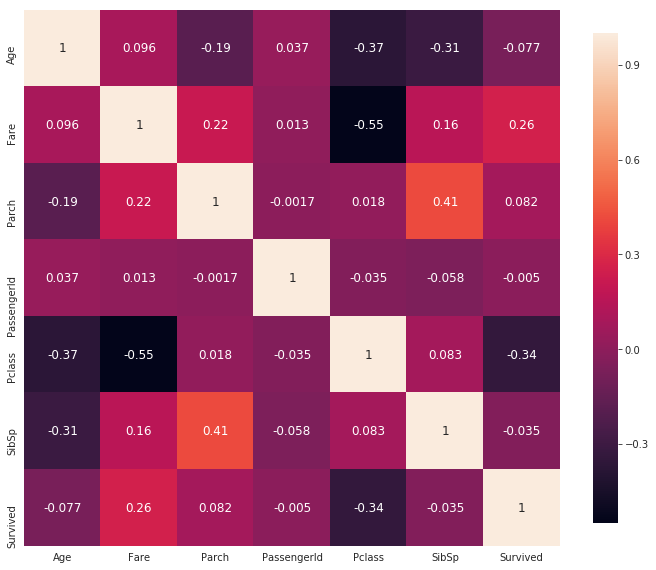

In [7]:
#checking the correlation amoung variables by plotting a heatmap
plot_correlation_map( titanic )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


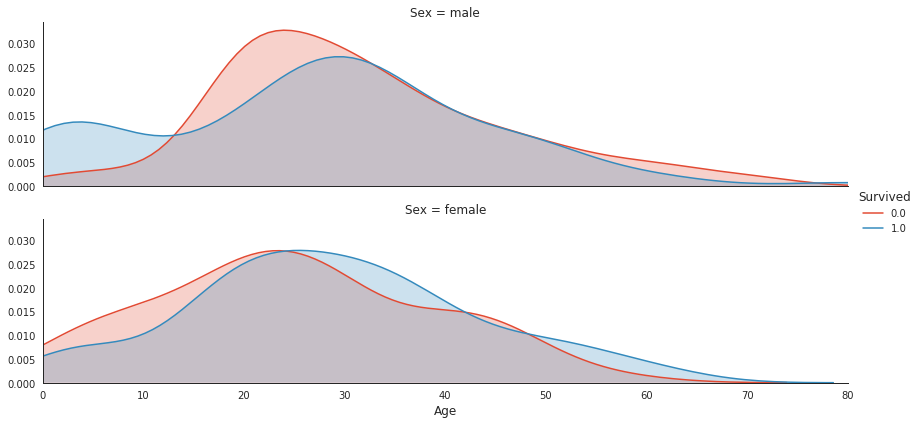

In [8]:
#Distributions of Age of passangers who survived or not
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


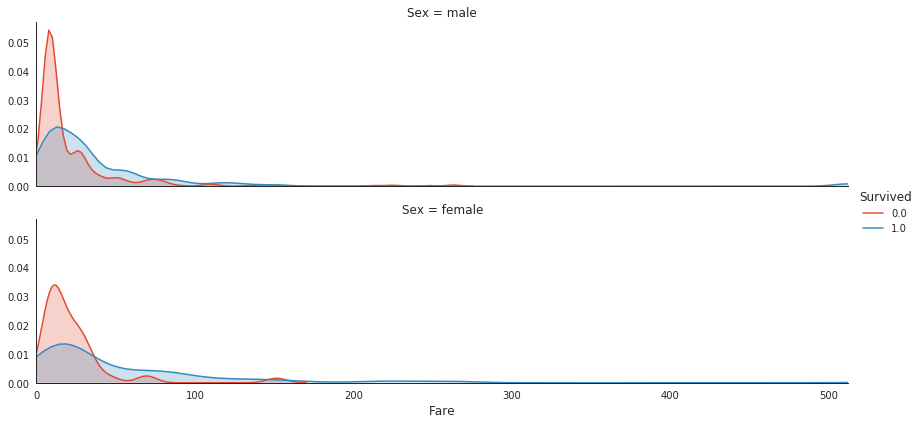

In [9]:
#Distributions of Fare of passengers who survived or not
plot_distribution(titanic , var= 'Fare' , target = 'Survived' , row= 'Sex')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


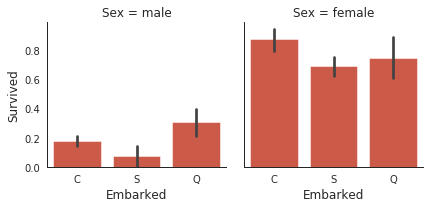

In [10]:
plot_categories(titanic , cat= 'Embarked' , target = 'Survived' , col= 'Sex')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


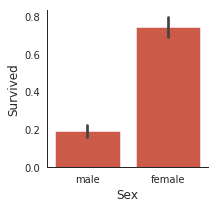

In [11]:
plot_categories(titanic , cat= 'Sex' , target = 'Survived' )

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


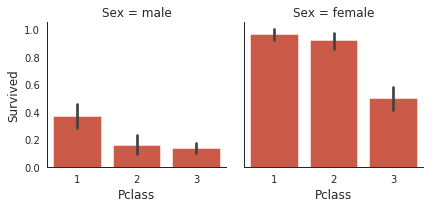

In [12]:
plot_categories(titanic , cat= 'Pclass' , target = 'Survived' , col= 'Sex')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


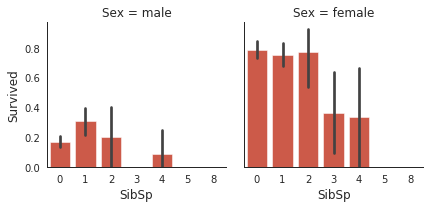

In [13]:
plot_categories(titanic , cat= 'SibSp' , target = 'Survived' , col='Sex' )

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


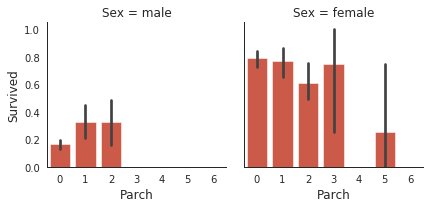

In [14]:
plot_categories(titanic , cat= 'Parch' , target = 'Survived' , col= 'Sex')

*** Data Cleaning ***

In [16]:
# Transform Sex into binary values 0 and 1
sex = pd.Series(np.where( full.Sex == 'male' , 1, 0 ) , name = 'Sex')


In [17]:
#new variable for every unique value of Embarked
embarked = pd.get_dummies(full.Embarked , prefix = 'Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
# new variable for every unique value of Pclass
pclass = pd.get_dummies ( full.Pclass , prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [19]:
#fill missing values
imputed = pd.DataFrame()

imputed['Age']   = full.Age.fillna(full.Age.mean())
imputed['Fare']  = full.Fare.fillna(full.Fare.mean())

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


*** Feature Engineering ***

In [20]:
#extract title from passenger names
title = pd.DataFrame()

title['Title'] = full['Name'].map(lambda name : name.split( ',' )[1].split( '.' )[0].strip())
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
#Map each title
title['Title'] =  title.Title.map( Title_Dictionary)
title = pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


*** Extract Cabin category information from the Cabin number***

In [21]:
cabin = pd.DataFrame()

#replace null values with U- Unknown
cabin['Cabin'] = full.Cabin.fillna( 'U' )

#Match cabin value with cabin number
cabin['Cabin'] = cabin['Cabin'].map(lambda c: c[0])

#Dummy Encoding
cabin = pd.get_dummies(cabin['Cabin'], prefix= 'Cabin')

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


***Extract ticket class from ticket number***

In [22]:
#function to extract each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def CleanTicket( ticket ):
    ticket = ticket.replace('.' , '')
    ticket = ticket.replace('/' , '')
    ticket = map(lambda t : t.strip(), ticket )
    ticket = list(filter (lambda t: not t.isdigit() , ticket))
    if len(ticket)>0:
     return ticket[0]
    else:
        return'XXX'
ticket = pd.DataFrame() 
# Extracting dummy variables from tickets:
ticket['Ticket'] = full['Ticket'].map(CleanTicket)
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_XXX
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


***Create family size and category for family size***

In [23]:
family = pd.DataFrame()

#Size of Family
family['FamilySize'] = full['Parch'] + full['SibSp'] + 1

#Categories based on Family Size
family['Family_Single'] = family['FamilySize'].map(lambda s : 1 if s ==1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda s : 1 if 2  <= s <=4 else 0 )
family['Family_Large'] = family['FamilySize'].map(lambda s : 1 if 5<= s else 0)

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


****Concatinating Final DataSet****

In [24]:
full_X = pd.concat([ imputed, cabin , sex , embarked , family , ticket , pclass] , axis=1)
full_X.head()

,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Family_Single,Family_Small,Family_Large,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_XXX,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0,0,0,0,0,0,0,0,1,1,0,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,26.0,7.9250,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,35.0,8.0500,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [36]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 30) (623, 30) (268, 30) (623,) (268,) (418, 30)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


***Feature Importance***

0.9951845906902087


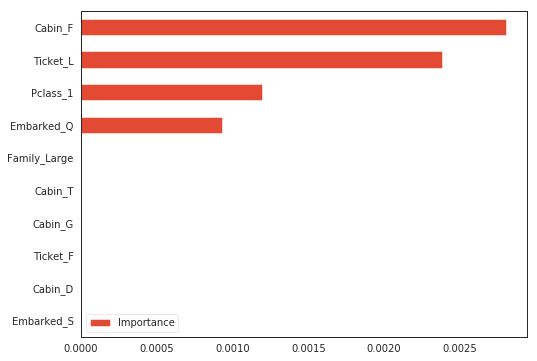

In [37]:
plot_variable_importance(train_X, train_y)

In [38]:
model = RandomForestClassifier(n_estimators=100)
model.fit( train_X , train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))


0.9951845906902087 0.7985074626865671


In [41]:
test_Y = model.predict( test_X )
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test['Survived'] = test['Survived'].astype(int)
test.to_csv( 'titanic_pred.csv' , index = False )